<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.4: Modelo K-Means</center></font>
</div>

## MODELO K-MEANS

El modelo **K-Means** es un algoritmo no supervisado de **Agrupamiento (Clustering)**, el cual se emplea cuando se requiere identificar los grupos inherentes en los datos, por ejemplo, realizar la agrupación de compradores en base a su manera de realizar las compras, además de utilizarse cuando se tienen muchos datos sin etiquetar. 

El objetivo de este algoritmo es encontrar *K* grupos (clusters) entre los datos crudos.

### ¿Cómo funciona K-Means?
El algoritmo trabaja iterativamente para asignar a cada punto (las filas del conjunto de entrada forman una coordenada) uno de los *K* grupos basado en sus características. Son agrupados en base a la similitud de sus *features* (las columnas). Como resultado de ejecutar el algoritmo se tiene:

* Los valores de los centroides (*centroids*) de cada grupo que serán unas coordenadas de cada uno de los *K* conjuntos que se utilizarán para poder etiquetar nuevas muestras.
* Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los *K* grupos formados.
* Los grupos se van definiendo de manera orgánica, es decir, se va ajustando su posición en cada iteración del proceso hasta que converge el algoritmo. 
* Una vez hallados los centroides se deben analizar para ver cuáles son sus características únicas frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

### Casos de uso de K-Means
El algoritmo **K-Means** es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar (o descartar) alguna teoría que se tiene asumida sobre el conjunto de datos. Y también puede ayudar a descubrir relaciones entre conjuntos de datos que de manera manual no se hubieran reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos casos de uso son:

* Segmentación por comportamiento: Relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
* Categorización de inventario: Agrupar productos por actividad en sus ventas.
* Detectar anomalías o actividades sospechosas: Según el comportamiento en una página web reconocer un troll (o un bot) de un usuario normal.

### Datos de entrada para K-Means
Las *features* o características que se utilizarán como entradas para aplicar el algoritmo **K-Means** deberán ser de valores numéricos (continuos en lo posible). 

En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela, etc.) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una *distancia real* para calcular. 

Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. No conviene utilizar características que estén correlacionados o que sean escalares de otros.

### El Algoritmo K-Means
El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo se deben pasar como entrada el conjunto de datos y un valor de *K*. El conjunto de datos serán las características o *features* para cada punto. Las posiciones iniciales de los *K* centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

1. Paso de asignación de datos: Cada fila del conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana.
2. Paso de actualización de centroide: Los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
* Si no hay cambios en los puntos asignados a los grupos.
* Si la suma de las distancias se minimiza.
* Si se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.

### Elegir el valor de K
Este algoritmo funciona pre-seleccionando un valor de *K*. Para encontrar el número de clústers en los datos, se debe ejecutar el algoritmo para un rango de valores *K*, ver los resultados y comparar características de los grupos obtenidos. En general no hay un modo exacto de determinar el valor *K*, pero se puede estimar con aceptable precisión siguiendo la siguiente técnica:

- Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroide. Como el valor de la media diminuirá a medida de aumentemos el valor de *K*, se debe utilizar la distancia media al centroide en función de *K* y entontrar el "punto codo", donde la tasa de descenso se "afila". A modo de ejemplo:
<br>
<img src="./Imagenes/ejemplo-elbow.png" style="width:600px;height:300px;" class="center">
<br>

### Implementación de un ejemplo
Para este ejemplo, se utilizarán como entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de **Twitter**. Se han filtrado a 140 personas reconocidas y de diversas partes del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de **Psicología** conocida como *Las 5 Dimensiones de la Personalidad* (*Ocean: The Big Five*, su descripción se puede revisar [en esta liga](https://www.verywellmind.com/the-big-five-personality-dimensions-2795422)), se obtiene un **DataFrame** del archivo `Ocean_Twitter.CSV` que contiene los siguientes encabezados de las columnas de información:

1. `usuario`: El nombre del usuario en Twitter (*texto*).
2. `op`: **Openness to experience** – Grado de apertura mental a nuevas experiencias (*flotante*).
3. `co`: **Conscientiousness** – Grado de orden y organización (*flotante*).
4. `ex`: **Extraversion** – Grado de timidez o participación ante el grupo social (*flotante*).
5. `ag`: **Agreeableness** – Grado de empatía con los demás y temperamento (*flotante*).
6. `ne`: **Neuroticism** – Grado de neuroticismo, nervioso, irritabilidad y seguridad en sí mismo (*flotante*).
7. `palabras`: Cantidad promedio de palabras usadas en sus Tweets (*flotante*).
8. `categoria`: Actividad laboral del usuario (actor, cantante, etc, es un valor *entero*).

Se utilizará el algoritmo **K-Means** para que agrupe estos usuarios por sus similitudes en la personalidad. 

**En problema consiste en determinar el grupo al que pertenece el usuario dependiendo de valores de personalidad específicos.**

Sólo se utilizarán 3 columnas como las entradas en este ejemplo, de modo que sea posibe visualizar los datos en un gráfico tridimensional (y sus proyecciones a 2D) y los grupos resultantes. Pero para casos reales, se pueden utilizar todas las dimensiones necesarias. 

***Una de las hipótesis que se puede tener es: "Todos los cantantes tendrán personalidad parecida". Se hará la prueba de ello, o por el contrario, se determinará si los grupos no están relacionados necesariamente con la actividad de estas celebridades.***

Para ello, primeramente se importarán las librerías **Pandas**, **NumPy** y **Matplotlib**:

In [2]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (16, 9)}) 
plt.style.use('ggplot')

Ahora se realiza la lectura del DataSet desde un archivo `CSV` y se guarda en un **DataFrame** de **Pandas**:

In [3]:
#Lectura del DataSet
datos_df = pd.read_csv("./Datos/Ocean_Twitter.csv")

#Impresión de los Resultados
print("El DataFrame es:")
datos_df.head(10)

El DataFrame es:


,usuario,op,co,ex,ag,ne,palabras,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7
7,andykusnetzoff,31.865118,16.588110,55.377559,36.258346,7.464646,66.2835,5
8,andyroddick,46.393488,25.451163,39.930310,16.658062,8.452791,145.1473,7
9,andy_murray,39.436667,26.135303,32.966288,32.291591,10.956591,177.5606,7


El archivo contiene diferenciadas 9 categorías (actividades laborales) que son:
1. Actor/Actriz.
2. Cantante.
3. Modelo.
4. Televisión/Series.
5. Radio.
6. Tecnología.
7. Deportes.
8. Política.
9. Escritor.

Para saber cuantos registros se tiene de cada uno de ellos, se emplean los métodos `.groupby()` y `.size()` de **Pandas** para la columna `categoria`, desde donde se puede ver que hay 34 cantantes, 27 actores, 17 deportistas, 16 políticos, entre otros:

In [4]:
#Mostrar la cantidad de valores por categoría en el DataFrame
print("La cantidad de valores por Categoría es:\n", datos_df.groupby('categoria').size())

La cantidad de valores por Categoría es:
 categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Ahora se revisan los histogramas de las columnas que contienen valores numéricos en el **DataFrame** a través del método `.hist()` de **Pandas**, con la finalidad de visualizar el comportamiento de los datos, pero sin considerar la columna `categoria`, para ello se usa el método `.drop()`. 

Las columnas con valores numéricos son:

* `op`: **Openness to experience** – Grado de apertura mental a nuevas experiencias (*flotante*).
* `co`: **Conscientiousness** – Grado de orden y organización (*flotante*).
* `ex`: **Extraversion** – Grado de timidez o participación ante el grupo social (*flotante*).
* `ag`: **Agreeableness** – Grado de empatía con los demás y temperamento (*flotante*).
* `ne`: **Neuroticism** – Grado de neuroticismo, nervioso, irritabilidad y seguridad en sí mismo (*flotante*).
* `palabras`: Cantidad promedio de palabras usadas en sus Tweets (*flotante*).

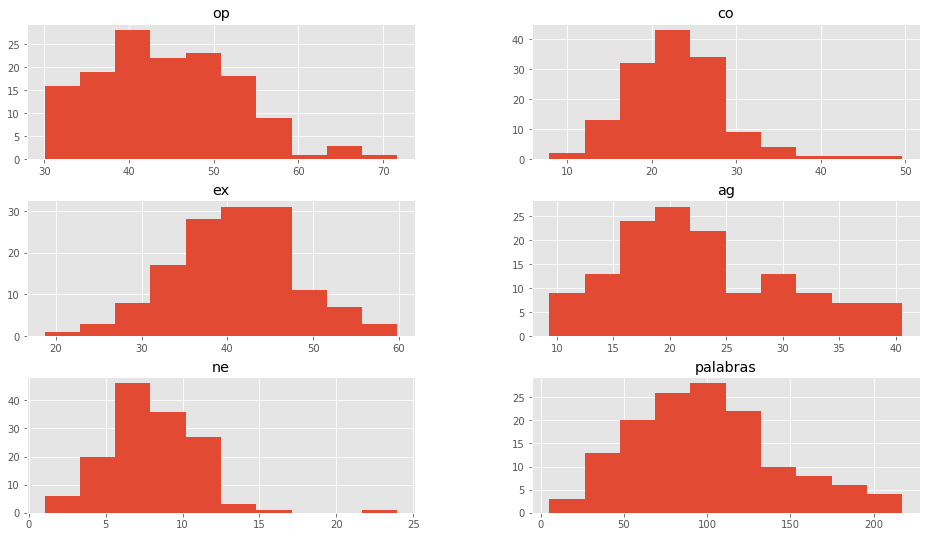

In [5]:
#Mostrar los histogramas del DataFrame
datos_df.drop(['categoria'],1).hist();

Ahora se seleccionan 3 dimensiones (`op`, `ex` y `ag`), y se cruzan para ver si proporcionan alguna pista de su agrupación y la relación con sus categorías:

* `op`: **Openness to experience** – Grado de apertura mental a nuevas experiencias.
* `ex`: **Extraversion** – Grado de timidez o participación ante el grupo social.
* `ag`: **Agreeableness** – Grado de empatía con los demás y temperamento.

Para ello se empleará el método `.pairplot()` de la librería **seaborn**, la cual es usada para visualización estadística de datos.

#### Librería Seaborn
<img src="./Imagenes/Seaborn_Logo.png" style="width:349px;height:100px;" title="Logo ITESO">

La librería **Seaborn** para **Python** está basada en **Matplotlib**, proporciona una interfaz de alto nivel para realizar gráficos estadísticos atractivos e informativos. 

La documentación detallada de la librería **Seaborn** se puede consultar [en esta liga](https://seaborn.pydata.org).

La descripción detallada del método `.pairplot()` se puede consultar [en esta liga](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

La paleta de color empleada en el método `.pairplot()` por medio del parámetro `palette` puede cambiarse de acuerdo a la lista disponible [en esta liga](https://seaborn.pydata.org/tutorial/color_palettes.html).

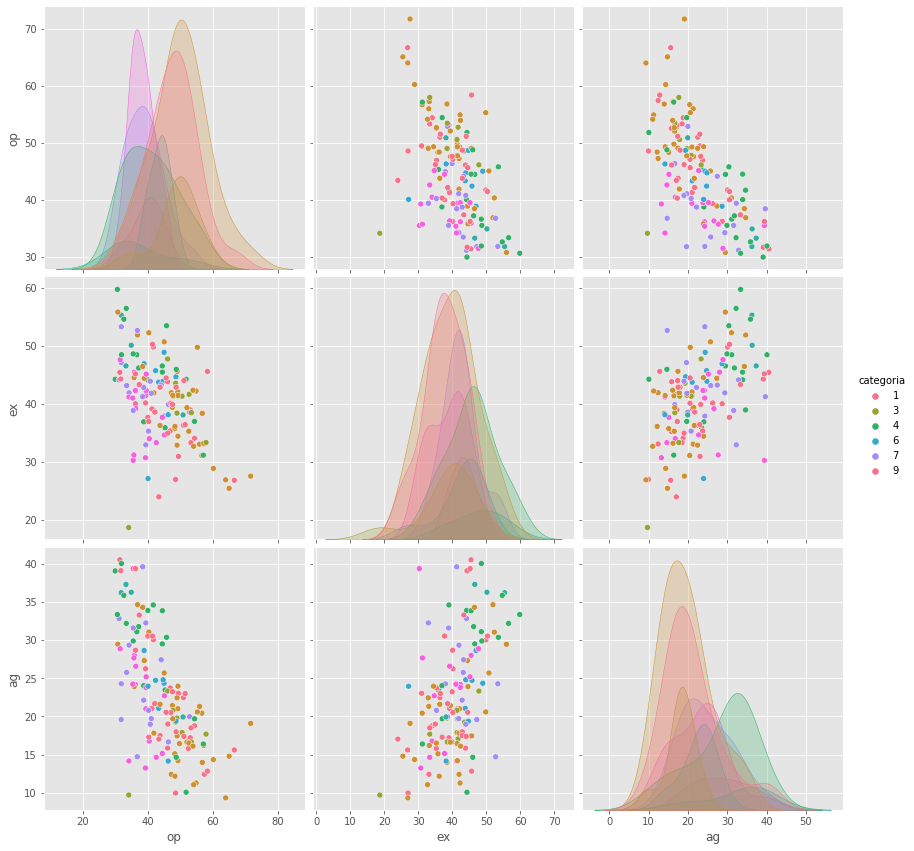

In [6]:
#Importación de librerías
import seaborn as sb

#Gráfico de las columnas 'op', 'ex' y 'ag' del DataFrame
sb.pairplot(datos_df.dropna(), hue = 'categoria', height = 4, vars = ['op','ex','ag'], kind = 'scatter', palette = 'husl');

Revisando las gráficas, no pareciera que haya algún tipo de agrupación o correlación entre los usuarios y sus categorías.

### Proceso de preparación de las entradas
Se concreta la estructura de datos que se utilizará para alimentar el algoritmo. Sólo se cargarán las columnas `op`, `ex` y `ag` en la variable X, las cuales se convierten en arreglos de **NumPy**:

In [7]:
#Definición de los valores X e y
X = np.array(datos_df[['op','ex','ag']])
y = np.array(datos_df['categoria'])

Ahora se visualizará una gráfica en 3D con 9 colores representando las categorías:

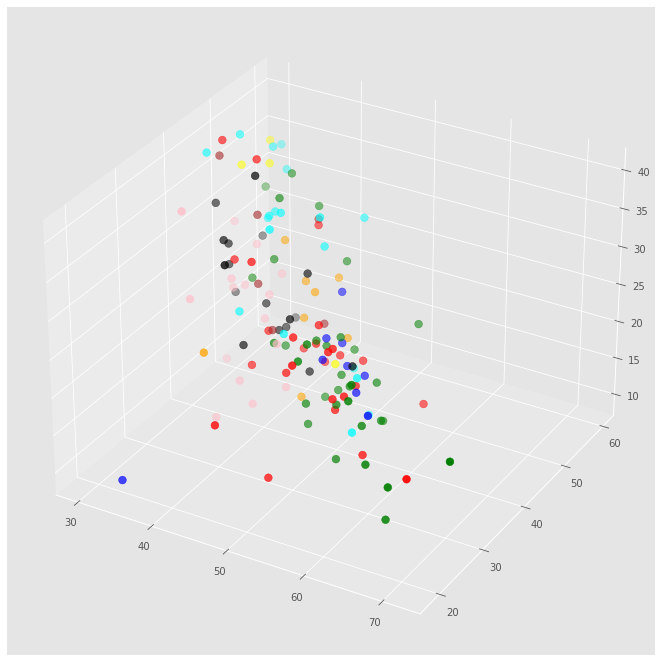

In [8]:
#Importación de librerías
from mpl_toolkits.mplot3d import Axes3D

#Gráfico 3D con los valores X e y
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60);

La intención es emplear **K-Means** para poder realizar esta misma gráfica de otra manera, donde los clusters estén totalmente diferenciados.

#### Obtener el valor de K
Para obtener el valor de *K*, se realizará una gráfica a partir de la cual se identifique el *punto de codo* que se comentó previamente. 

Para ello se empleará la librería **SciKit-Learn**, la cual contiene herramientas simples y eficientes para análisis predictivo de datos.
<br>
<img src="./Imagenes/scikit.png" style="width:200px;height:108px;" class="center">
<br>
La documentación de **SciKit-Learn** se puede encontrar a través [de esta liga](https://scikit-learn.org/stable/).

Se puede realizar de la siguiente manera:

C:\Users\erick\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


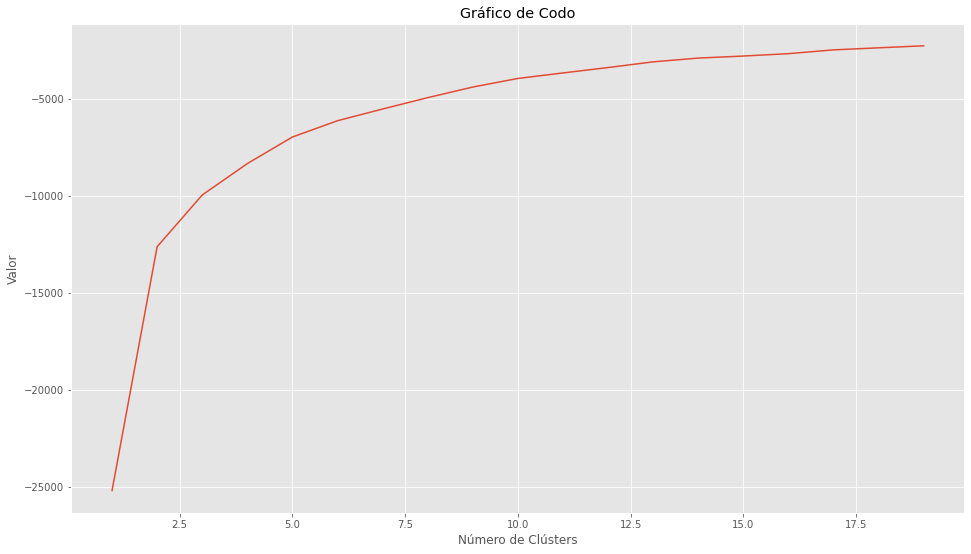

In [9]:
#Importación de librerías
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#Determinación del valor K
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

#Gráfico de Codo
plt.plot(Nc,score);
plt.xlabel('Número de Clústers');
plt.ylabel('Valor');
plt.title('Gráfico de Codo');
plt.show();

Para este ejemplo en particular, la curva está sumamente suavizada. Aproximadamente se puede ver que el valor es *K = 5*, pero puede variar según el criterio de cada persona.

#### Ejecución de K-Means
Se ejecuta el algoritmo para 5 clusters (*K = 5*) y se obtienen las etiquetas y los centroides. Para ello se empleará la función `KMeans` de **SciKit-Learn**.

La documentación de la función `KMeans` se puede encontrar a través [de esta liga](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [10]:
#Aplicación del Modelo K-Means
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
print("Los valores de los centroides son: \n", centroids)

Los valores de los centroides son: 
 [[42.02071263 33.51453704 21.58804975]
 [58.58657531 31.02839375 15.6120435 ]
 [34.378121   48.97419171 34.38722504]
 [49.80086386 40.8972579  17.48224326]
 [39.86615385 44.50444971 25.91589424]]


Ahora se visualizará en una gráfica 3D con colores para los grupos, donde las estrellas marcan el centro de cada cluster:

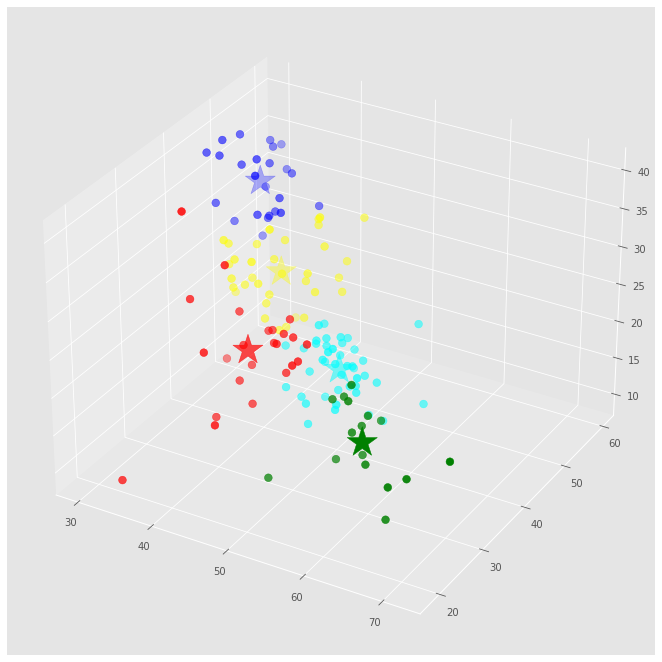

In [11]:
#Etiquetas de cada punto de los datos
labels = kmeans.predict(X)

#Determinación de los centroides
C = kmeans.cluster_centers_
colores = ['red','green','blue','cyan','yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

#Gráfico 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60);
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000);

Es posible ver que el algoritmo **K-Means** con *K = 5* ha agrupado a los 140 usuarios de **Twitter** por su personalidad, teniendo en cuenta las 3 dimensiones utilizadas (**Openess** `op`, **Extraversion** `ex`, y **Agreeablenes** `ag`). Pareciera que no hay necesariamente una relación en los grupos con sus actividades de celebridad.

Ahora se realizarán 3 gráficas 2D con las proyecciones a partir del gráfico 3D, las cuales serán de ayuda para visualizar los grupos y su clasificación.

Primero, con los valores de `op` y `ex`:

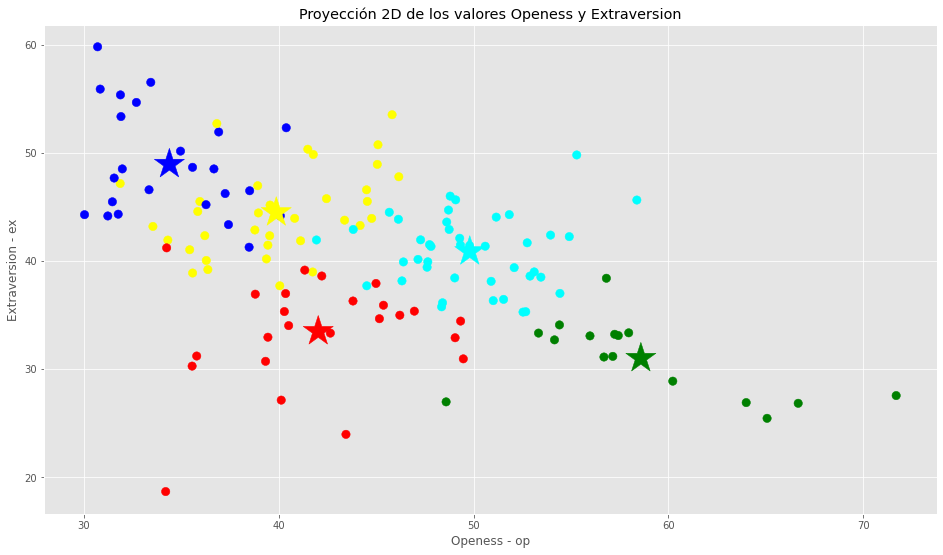

In [12]:
#Proyección a 2D con 'op' y 'ex'
f1 = datos_df['op'].values
f2 = datos_df['ex'].values

#Gráfico de Proyección 2D
plt.scatter(f1, f2, c = asignar, s = 70);
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = colores, s = 1000);
plt.xlabel("Openess - op");
plt.ylabel("Extraversion - ex");
plt.title("Proyección 2D de los valores Openess y Extraversion");
plt.show();

Ahora, con los valores de `op` y `ag`:

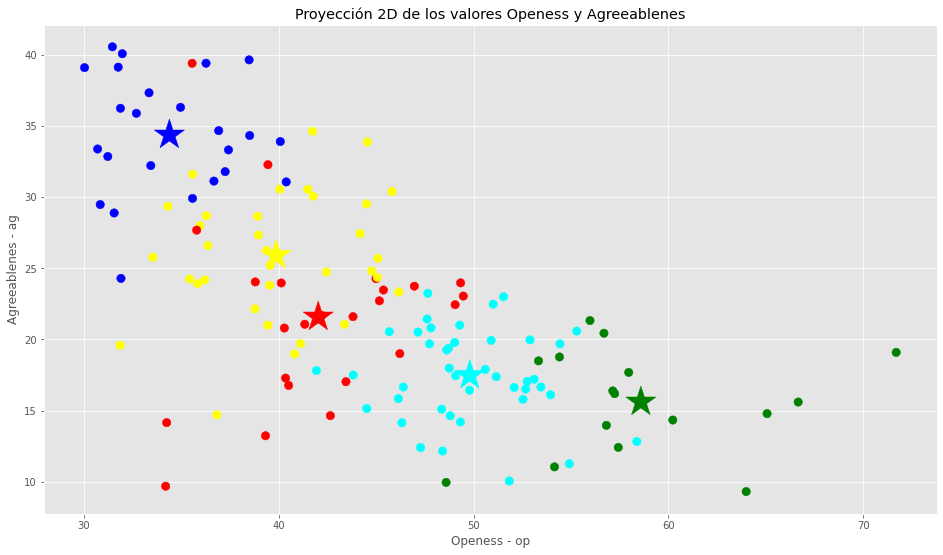

In [13]:
#Proyección a 2D con 'op' y 'ag'
f1 = datos_df['op'].values
f3 = datos_df['ag'].values

#Gráfico de Proyección 2D
plt.scatter(f1, f3, c = asignar, s = 70);
plt.scatter(C[:, 0], C[:, 2], marker = '*', c = colores, s = 1000);
plt.xlabel("Openess - op");
plt.ylabel("Agreeablenes - ag");
plt.title("Proyección 2D de los valores Openess y Agreeablenes");
plt.show();

Finalmente, con los valores de `ex` y `ag`:

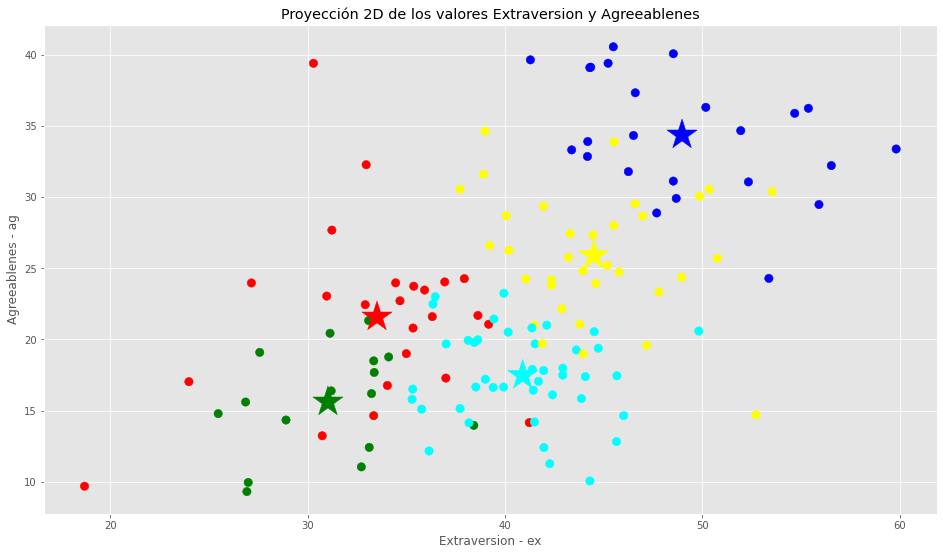

In [14]:
#Proyección a 2D con 'ex' y 'ag'
f2 = datos_df['ex'].values
f3 = datos_df['ag'].values

#Gráfico de Proyección 2D
plt.scatter(f2, f3, c = asignar, s = 70);
plt.scatter(C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000);
plt.xlabel("Extraversion - ex");
plt.ylabel("Agreeablenes - ag");
plt.title("Proyección 2D de los valores Extraversion y Agreeablenes");
plt.show();

A partir de los gráficos se puede ver que están bastante bien diferenciados los grupos.

Ahora, es posible visualizar cuántos usuarios tiene cada uno de los clústers:

In [15]:
#Copia de los Usuarios junto con su respectivo Clúster (label)
copy = pd.DataFrame()
copy['usuario'] = datos_df['usuario'].values
copy['categoria'] = datos_df['categoria'].values
copy['label'] = labels;

#Conteo de Usuarios por cada Clúster (label)
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color'] = ['rojo', 'verde', 'azul', 'cyan', 'amarillo']
cantidadGrupo['cantidad'] = copy.groupby('label').size()

#Impresión de los Resultados
print("La cantidad de usuarios en cada clúster es:")
display(cantidadGrupo)

La cantidad de usuarios en cada clúster es:


,color,cantidad
0,rojo,24
1,verde,16
2,azul,24
3,cyan,42
4,amarillo,34


De ello, se puede ver la diversidad en las categorías laborales de cada uno de los usuarios en un clúster en específico.

Por ejemplo, en el clúster `0` correspondiente al color rojo, los usuarios incluidos y sus actividades laborales son:

In [16]:
#Copia de los Usuarios contenidos en el Clúster 0 (red)
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

#Conteo de Usuarios contenidos en el Clúster 0 (red)
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Categoria'] = [0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['Descripción'] = ['','Actor/Actriz', 'Cantante', 'Modelo', 'Televisión/Series', 'Radio', 'Tecnología', 'Deportes', 'Política', 'Escritor']
diversidadGrupo['Cantidad'] = group_referrals.groupby('categoria').size()
diversidadGrupo.set_index('Categoria', inplace = True)
diversidadGrupo.drop(index = 0, inplace = True)

#Impresión de los Resultados
print("La cantidad total de usuarios en el cluster 0 es:", cantidadGrupo.iloc[0].loc['cantidad'])
print("La categoría de los usuarios en el clúster 0 es:")
display(diversidadGrupo)

La cantidad total de usuarios en el cluster 0 es: 24
La categoría de los usuarios en el clúster 0 es:


,Descripción,Cantidad
Categoria,,
1,Actor/Actriz,6.0
2,Cantante,3.0
3,Modelo,1.0
4,Televisión/Series,2.0
5,Radio,NaN
6,Tecnología,1.0
7,Deportes,3.0
8,Política,7.0
9,Escritor,1.0


Se pueden mostrar los usuarios que están en la categoría 2 del grupo:

In [20]:
#Usuarios con Categoria 2 del Grupo
print("Los usuarios en la Categoría 2 (Cantante) del Clúster 0 son:")
for index, row in group_referrals.iterrows():
    if row['categoria'] == 2:
        print (row['usuario'])

Los usuarios en la Categoría 2 (Cantante) del Clúster 0 son:
justinbieber
ladygaga
thelittleidiot


Ahora se buscarán los usuarios que están mas cerca a los centroides de cada grupo, para los cuales se puede decir que tienen los rasgos de personalidad característicos que representan a cada clúster.

El resultado es un ***array***, el cual indica la posición en el arreglo de los usuarios:

In [21]:
#Mostrar el usuario mas cercano a cada centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)

#Impresión de los Resultados
print("Los usuarios mas cercanos a cada Centroide son los número:")
print(closest)

Los usuarios mas cercanos a cada Centroide son los número:
[ 91  82  35  21 107]


Y para mostrar su nombre:

In [22]:
#Mostrar el nombre del usuario mas cercano a cada centroide
print("Los usuarios mas cercanos a cada Centroide son:")
users = datos_df['usuario'].values
for row in closest:
    print(users[row])

Los usuarios mas cercanos a cada Centroide son:
kobebryant
JudgeJudy
DaniMateoAgain
carmenelectra
Pablo_Iglesias_


Además, es posible ver a todos los usuarios del clúster. En este caso para el clúster 0:

In [23]:
#Mostrar el nombre de los usuarios en el clúster 0
print("Los usuarios del Clúster 0 son:")
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"])

Los usuarios del Clúster 0 son:
aguerosergiokun
andy_murray
antoniobanderas
Carrie_Br4dshaw
cesarmillan
Clyburn
Diane_Keaton
GeorgeHWBush
GwynethPaltrow
HerreraBeutler
HillaryClinton
hughlaurie
jiminhofe
jk_rowling
justinbieber
kobebryant
ladygaga
Rep_Hunter
SarahPalinUSA
SJP
SSantiagosegura
stevewoz
thelittleidiot
tomhanks


#### Clasificación de nuevas muestras
Finalmente, es posible agrupar y etiquetar nuevos usuarios de Twitter con sus características y clasificarlos.

Para este ejemplo, se proporcionan los valores `op`, `ex` y `ag` del usuario nuevo que se quiere clasificar (en este caso es el usuario ***David Guetta***), y la función devuelve el clúster al que pertenece: 

In [24]:
#Clasificación de nuevas muestras
X_new = np.array([[45.92, 57.74, 15.66]]) 
new_labels = kmeans.predict(X_new)

#Impresión de los Resultados
print("El nuevo usuario pertenece al Clúster número:", new_labels)

El nuevo usuario pertenece al Clúster número: [3]


<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>